# Neural Network

Random Forest is a powerful ensemble machine learning algorithm that is widely used for both classification and regression tasks. It is based on the concept of decision trees and combines multiple decision trees to make more accurate and robust predictions. Random Forest was developed by Leo Breiman and Adele Cutler and has become a popular choice in various applications due to its ability to handle complex datasets and reduce overfitting.

Here are the key components and concepts associated with neural networks:
#### 1. Neurons (Nodes or Units)
#### 2.Layer
#### 3.Connections (Edges)
#### 4.Activation Function
#### 5.Feedforward Propagation
During inference or prediction, data flows through the network in a forward direction, from the input layer through the hidden layers to the output layer.
#### 6. Training
#### 7.Deep Learning
#### 8.Architectures

## Problem Statement 1:

The dataset contains 36733 instances of 11 sensor measures aggregated over one hour (by means of average or sum) from a gas turbine. 
The Dataset includes gas turbine parameters (such as Turbine Inlet Temperature and Compressor Discharge pressure) in addition to the ambient variables.

Problem statement: predicting turbine energy yield (TEY) using ambient variables as features.


### Importing Libraries

In [358]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import GridSearchCV,KFold,StratifiedKFold,cross_val_score, train_test_split,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.metrics import mean_squared_error

from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense , Dropout
from keras.utils import np_utils
from keras.constraints import maxnorm

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

In [359]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [360]:
ls

 Volume in drive C has no label.
 Volume Serial Number is A239-1DCD

 Directory of C:\Users\HP\OneDrive\Desktop\Sayali Assignments\Neural Newtwork

19-01-2023  22:07    <DIR>          .
19-01-2023  22:07    <DIR>          ..
19-01-2023  01:59    <DIR>          .ipynb_checkpoints
19-01-2023  22:07           681,723 Assignment no.16.ipynb
06-01-2023  23:06            46,843 forestfires.csv
06-01-2023  23:06         1,155,536 gas_turbines.csv
06-01-2023  23:06             1,130 problem statment(Gas turbines).txt
06-01-2023  23:06                61 Problem_statement(fireforests).txt
               5 File(s)      1,885,293 bytes
               3 Dir(s)  148,127,862,784 bytes free


### Reading file

In [361]:
turbine = pd.read_csv('gas_turbines.csv')
turbine.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


### EDA

In [362]:
turbine.shape

(15039, 11)

In [363]:
turbine.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [364]:
turbine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [365]:
turbine.value_counts()

AT       AP      AH      AFDP    GTEP    TIT     TAT     TEY     CDP     CO        NOX    
0.5223   1005.2  82.567  3.8504  20.314  1028.6  528.15  113.82  10.651  11.62700  100.120    1
21.9700  1013.4  90.491  3.7780  25.315  1090.6  550.24  133.81  12.130  0.88213   61.486     1
21.9500  1006.6  98.916  3.8226  24.822  1087.2  550.25  131.73  11.983  1.02890   57.825     1
21.9510  1015.3  95.978  3.5781  19.768  1057.1  549.86  109.83  10.475  5.32560   54.436     1
21.9530  1013.1  92.079  3.2656  21.138  1066.1  549.92  116.70  10.875  1.59050   53.454     1
                                                                                             ..
13.6150  1016.4  95.714  4.4170  24.088  1084.7  550.16  132.57  11.863  1.52420   72.780     1
13.6170  1013.8  90.408  3.8901  21.650  1069.0  549.86  121.00  11.112  3.81930   71.042     1
13.6200  1008.8  69.582  4.4356  24.236  1085.8  550.34  133.32  11.905  0.81195   74.920     1
13.6210  1017.4  84.170  4.0292  24.034  1086

In [366]:
turbine.duplicated().sum()

0

In [367]:
corr = turbine.corr()
corr

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
AT,1.000000,-0.412953,-0.549432,-0.099333,-0.049103,0.093067,0.338569,-0.207495,-0.100705,-0.088588,-0.600006
AP,-0.412953,1.000000,0.042573,0.040318,0.078575,0.029650,-0.223479,0.146939,0.131198,0.041614,0.256744
AH,-0.549432,0.042573,1.000000,-0.119249,-0.202784,-0.247781,0.010859,-0.110272,-0.182010,0.165505,0.143061
AFDP,-0.099333,0.040318,-0.119249,1.000000,0.744251,0.627254,-0.571541,0.717995,0.727152,-0.334207,-0.037299
GTEP,-0.049103,0.078575,-0.202784,0.744251,1.000000,0.874526,-0.756884,0.977042,0.993784,-0.508259,-0.208496
TIT,0.093067,0.029650,-0.247781,0.627254,0.874526,1.000000,-0.357320,0.891587,0.887238,-0.688272,-0.231636
TAT,0.338569,-0.223479,0.010859,-0.571541,-0.756884,-0.357320,1.000000,-0.720356,-0.744740,0.063404,0.009888
TEY,-0.207495,0.146939,-0.110272,0.717995,0.977042,0.891587,-0.720356,1.000000,0.988473,-0.541751,-0.102631
CDP,-0.100705,0.131198,-0.182010,0.727152,0.993784,0.887238,-0.744740,0.988473,1.000000,-0.520783,-0.169103
CO,-0.088588,0.041614,0.165505,-0.334207,-0.508259,-0.688272,0.063404,-0.541751,-0.520783,1.000000,0.316743


### Visualization

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


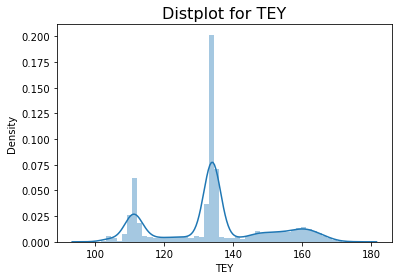

In [368]:
# distplot
plt.title('Distplot for TEY',fontsize=16)
sns.distplot(turbine['TEY'])
plt.show()

<AxesSubplot:>

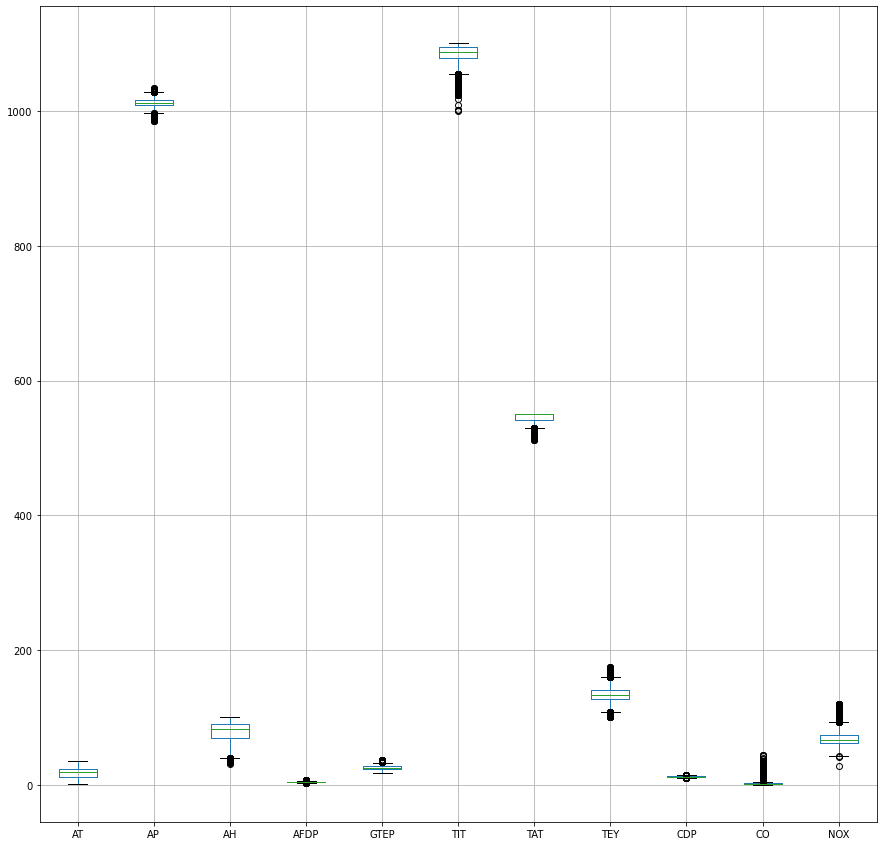

In [369]:
# Boxplot
turbine.boxplot(figsize=(15,15))

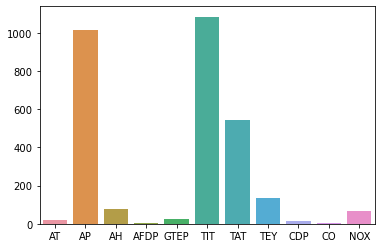

In [370]:
sns.barplot(data=turbine)
plt.show()

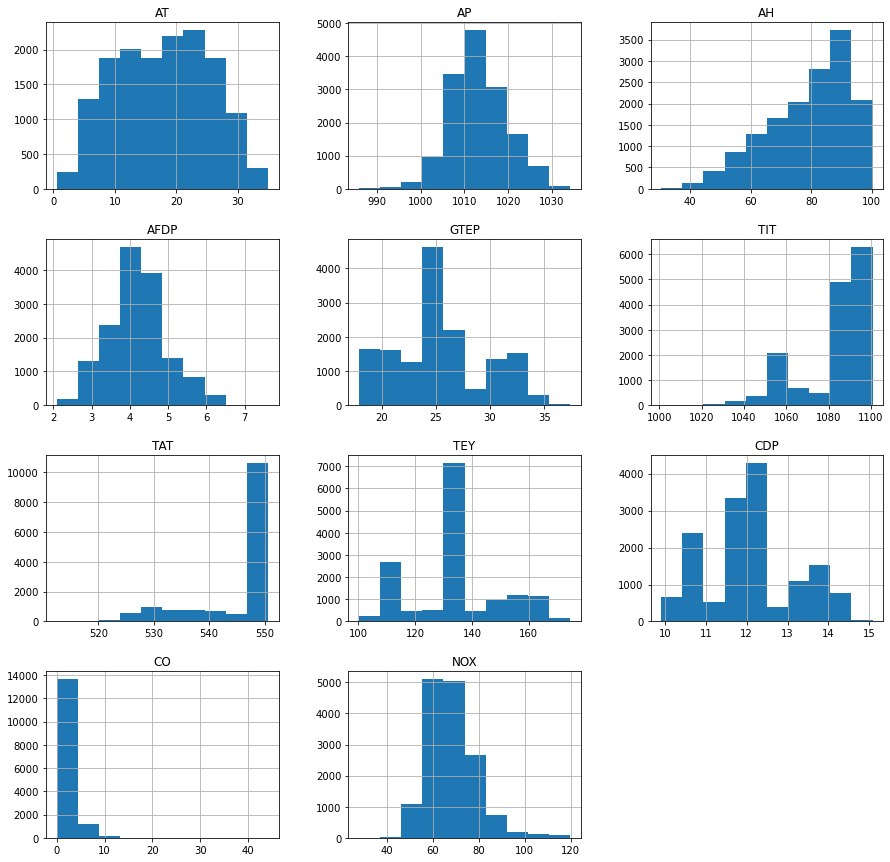

In [371]:
# Histogram
turbine.hist(figsize=(15,15))
plt.show()

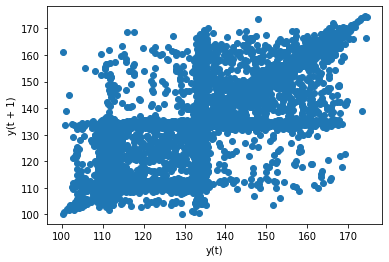

In [372]:
from pandas.plotting import lag_plot
lag_plot(turbine['TEY'])
plt.show()

Boxplot - AT


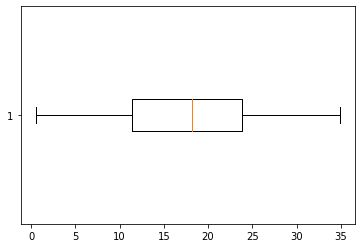

Boxplot - AP


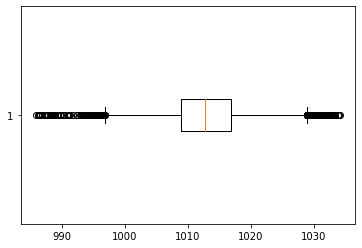

Boxplot - AH


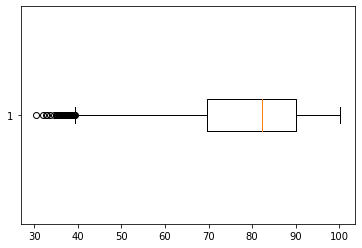

Boxplot - AFDP


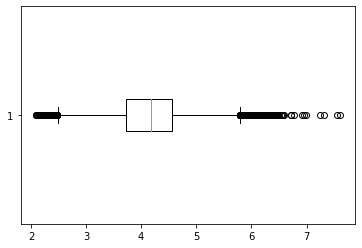

Boxplot - GTEP


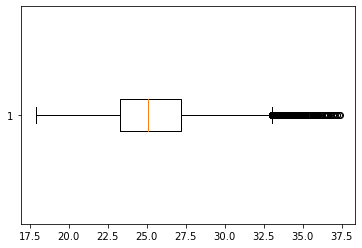

Boxplot - TIT


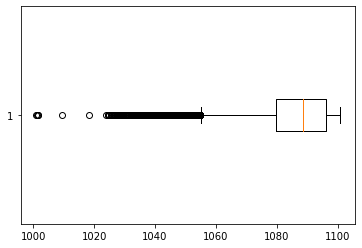

Boxplot - TAT


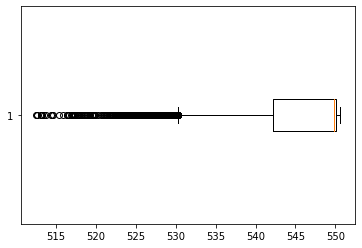

Boxplot - TEY


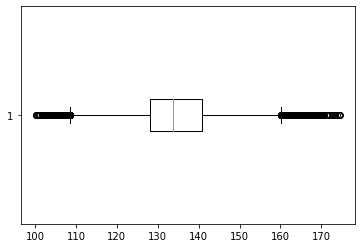

Boxplot - CDP


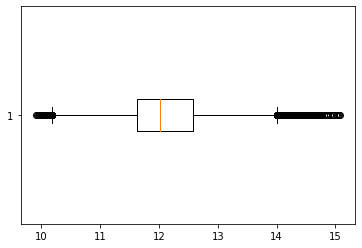

Boxplot - CO


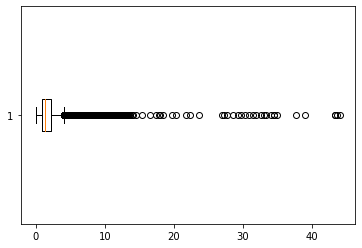

Boxplot - NOX


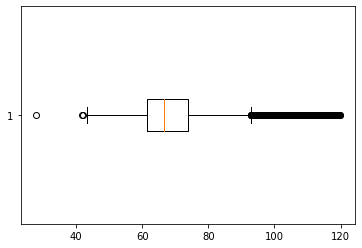

In [373]:
# Boxplot for outliers 
for i in turbine.columns:
    print('Boxplot -',i)
    plt.boxplot(turbine[i],vert=False)
    plt.show()

Interfernce

AT,AP NOX are Normally distributed

AH, TIT, TAT are Negatively skewed

AFDP, GTEP, CDP, CO are positively skewed

In [374]:
# Correlation of TEY with all other variables
corr1 = pd.DataFrame(data=turbine.corr().iloc[:,7],index=turbine.columns)
corr1=corr1.sort_values(by='TEY',ascending=False)
corr1

,TEY
TEY,1.000000
CDP,0.988473
GTEP,0.977042
TIT,0.891587
AFDP,0.717995
AP,0.146939
NOX,-0.102631
AH,-0.110272
AT,-0.207495
CO,-0.541751


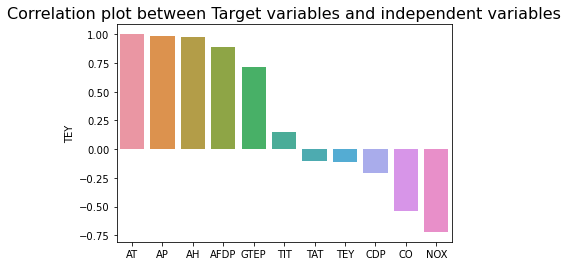

In [375]:
plt.title("Correlation plot between Target variables and independent variables",fontsize=16)
sns.barplot(x=corr.index,y=corr1.TEY)
plt.show()

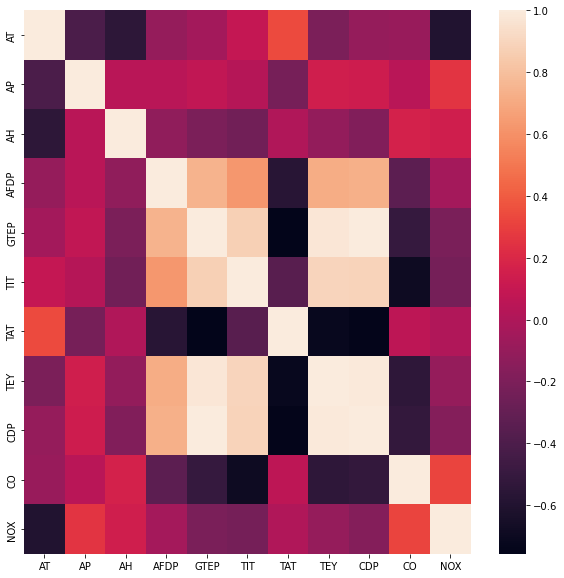

In [376]:
# Heatmap
plt.figure(figsize=(10,10))
sns.heatmap(corr)
plt.show()

### Splitting Input and Output variables

In [377]:
turbine.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

In [378]:
X = turbine.loc[:,['AT','AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'CDP', 'CO','NOX']]

In [379]:
Y = turbine.iloc[:,7]

In [380]:
X.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311


In [381]:
X.shape

(15039, 10)

In [382]:
Y.head()

0    114.70
1    114.72
2    114.71
3    114.72
4    114.72
Name: TEY, dtype: float64

### Scaling values

In [383]:
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()
turbine_norm = minmax.fit_transform(X)

In [384]:
turbine_norm

array([[0.18418215, 0.45604964, 0.95131413, ..., 0.1353398 , 0.07152212,
        0.59654817],
       [0.18201978, 0.4663909 , 0.95588067, ..., 0.13398756, 0.07337235,
        0.59713433],
       [0.18529531, 0.47466391, 0.93900309, ..., 0.13456709, 0.07257648,
        0.59379104],
       ...,
       [0.19596183, 0.4229576 , 0.98992213, ..., 0.11177221, 0.18055195,
        0.68544912],
       [0.18844295, 0.43329886, 0.98293633, ..., 0.12143106, 0.14169257,
        0.71057802],
       [0.18617304, 0.44157187, 0.96182146, ..., 0.1310899 , 0.11294597,
        0.70266486]])

### Splitting into training and testing data

In [385]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(turbine_norm,Y,test_size=0.4,random_state=56)

In [386]:
X_train.shape,X_test.shape

((9023, 10), (6016, 10))

In [387]:
y_train.shape,y_test.shape

((9023,), (6016,))

### Building Model

In [388]:
first_model = Sequential([Dense(10,activation='relu',input_shape=(10,)),
                          Dense(15,activation='relu'),
                          Dense(1,activation='sigmoid')])

In [389]:
first_model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 10)                110       
                                                                 
 dense_46 (Dense)            (None, 15)                165       
                                                                 
 dense_47 (Dense)            (None, 1)                 16        
                                                                 
Total params: 291
Trainable params: 291
Non-trainable params: 0
_________________________________________________________________


In [390]:
# loss function for output take mean square error
first_model.compile(optimizer='adam',
                    loss ='mse',
                    metrics=['mse','mae'])

In [391]:
# Fitting the model with train and test data
from sklearn.model_selection import train_test_split

hist=first_model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=1000)

Epoch 1/100
10/10 [==============================] - 2s 45ms/step - loss: 18082.6621 - mse: 18082.6621 - mae: 133.5369 - val_loss: 18125.4473 - val_mse: 18125.4473 - val_mae: 133.6984
Epoch 2/100
10/10 [==============================] - 0s 16ms/step - loss: 18075.2539 - mse: 18075.2539 - mae: 133.5093 - val_loss: 18117.1094 - val_mse: 18117.1094 - val_mae: 133.6675
Epoch 3/100
10/10 [==============================] - 0s 19ms/step - loss: 18066.1523 - mse: 18066.1523 - mae: 133.4755 - val_loss: 18106.8242 - val_mse: 18106.8242 - val_mae: 133.6293
Epoch 4/100
10/10 [==============================] - 0s 19ms/step - loss: 18055.1543 - mse: 18055.1543 - mae: 133.4345 - val_loss: 18094.7930 - val_mse: 18094.7930 - val_mae: 133.5845
Epoch 5/100
10/10 [==============================] - 0s 18ms/step - loss: 18042.7031 - mse: 18042.7031 - mae: 133.3881 - val_loss: 18081.8691 - val_mse: 18081.8691 - val_mae: 133.5363
Epoch 6/100
10/10 [==============================] - 0s 19ms/step - loss: 18029.

10/10 [==============================] - 0s 15ms/step - loss: 17970.9863 - mse: 17970.9863 - mae: 133.1176 - val_loss: 18017.8516 - val_mse: 18017.8516 - val_mae: 133.2948
Epoch 90/100
10/10 [==============================] - 0s 14ms/step - loss: 17970.9863 - mse: 17970.9863 - mae: 133.1176 - val_loss: 18017.8516 - val_mse: 18017.8516 - val_mae: 133.2948
Epoch 91/100
10/10 [==============================] - 0s 11ms/step - loss: 17970.9844 - mse: 17970.9844 - mae: 133.1176 - val_loss: 18017.8516 - val_mse: 18017.8516 - val_mae: 133.2948
Epoch 92/100
10/10 [==============================] - 0s 11ms/step - loss: 17970.9844 - mse: 17970.9844 - mae: 133.1176 - val_loss: 18017.8516 - val_mse: 18017.8516 - val_mae: 133.2948
Epoch 93/100
10/10 [==============================] - 0s 14ms/step - loss: 17970.9844 - mse: 17970.9844 - mae: 133.1176 - val_loss: 18017.8516 - val_mse: 18017.8516 - val_mae: 133.2948
Epoch 94/100
10/10 [==============================] - 0s 16ms/step - loss: 17970.9844 - 

In [392]:
# fuction return accuracy at second element
first_model.evaluate(X_train,y_train)[1]

282/282 [==============================] - 1s 3ms/step - loss: 17970.9844 - mse: 17970.9844 - mae: 133.1176


17970.984375

### Visualization

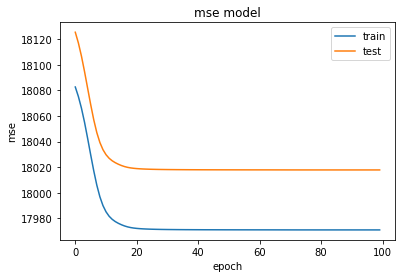

In [393]:
# History for accuracy
plt.plot(hist.history['mse'])
plt.plot(hist.history['val_mse'])
plt.title('mse model')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='best')
plt.show()

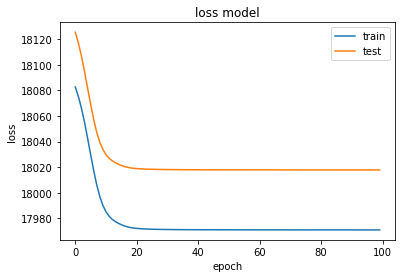

In [394]:
# History for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('loss model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='best')
plt.show()

In [397]:
second_model = Sequential([Dense(30,activation='relu',input_shape=(10,)),
                           Dense(35,activation='relu'),
                           Dense(20,activation='relu'),
                           Dense(1,activation='sigmoid')])

In [398]:
second_model.compile(optimizer='adam',
                    loss ='mse',
                    metrics=['mse','mae'])

In [399]:
hist2=second_model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=500)

Epoch 1/100
19/19 [==============================] - 2s 28ms/step - loss: 18102.2695 - mse: 18102.2695 - mae: 133.6093 - val_loss: 18116.2129 - val_mse: 18116.2129 - val_mae: 133.6633
Epoch 2/100
19/19 [==============================] - 0s 12ms/step - loss: 18043.7285 - mse: 18043.7285 - mae: 133.3912 - val_loss: 18059.9746 - val_mse: 18059.9746 - val_mae: 133.4539
Epoch 3/100
19/19 [==============================] - 0s 13ms/step - loss: 17994.0078 - mse: 17994.0078 - mae: 133.2051 - val_loss: 18025.7266 - val_mse: 18025.7266 - val_mae: 133.3251
Epoch 4/100
19/19 [==============================] - 0s 13ms/step - loss: 17975.2012 - mse: 17975.2012 - mae: 133.1340 - val_loss: 18019.7305 - val_mse: 18019.7305 - val_mae: 133.3022
Epoch 5/100
19/19 [==============================] - 0s 12ms/step - loss: 17972.2656 - mse: 17972.2656 - mae: 133.1226 - val_loss: 18018.6602 - val_mse: 18018.6602 - val_mae: 133.2980
Epoch 6/100
19/19 [==============================] - 0s 13ms/step - loss: 17971.

19/19 [==============================] - 0s 10ms/step - loss: 17970.9824 - mse: 17970.9824 - mae: 133.1176 - val_loss: 18017.8496 - val_mse: 18017.8496 - val_mae: 133.2948
Epoch 90/100
19/19 [==============================] - 0s 14ms/step - loss: 17970.9785 - mse: 17970.9785 - mae: 133.1176 - val_loss: 18017.8496 - val_mse: 18017.8496 - val_mae: 133.2948
Epoch 91/100
19/19 [==============================] - 0s 9ms/step - loss: 17970.9805 - mse: 17970.9805 - mae: 133.1175 - val_loss: 18017.8496 - val_mse: 18017.8496 - val_mae: 133.2948
Epoch 92/100
19/19 [==============================] - 0s 12ms/step - loss: 17970.9824 - mse: 17970.9824 - mae: 133.1175 - val_loss: 18017.8496 - val_mse: 18017.8496 - val_mae: 133.2948
Epoch 93/100
19/19 [==============================] - 0s 9ms/step - loss: 17970.9805 - mse: 17970.9805 - mae: 133.1176 - val_loss: 18017.8496 - val_mse: 18017.8496 - val_mae: 133.2948
Epoch 94/100
19/19 [==============================] - 0s 11ms/step - loss: 17970.9805 - ms

In [400]:
second_model.evaluate(X_train,y_train)[1]

282/282 [==============================] - 1s 3ms/step - loss: 17970.9844 - mse: 17970.9844 - mae: 133.1176


17970.984375

### Visualization

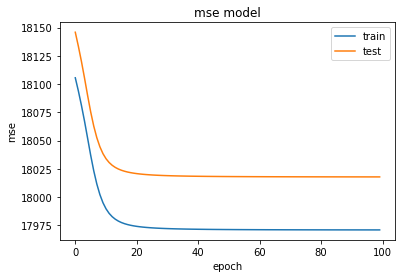

In [201]:
# History for accuracy
plt.plot(hist.history['mse'])
plt.plot(hist.history['val_mse'])
plt.title('mse model')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='best')
plt.show()

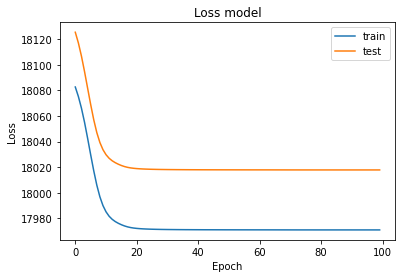

In [401]:
# History for accuracy
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','test'],loc='best')
plt.show()

## Problem Statement 2:

PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS

### Importing file

In [402]:
ls

 Volume in drive C has no label.
 Volume Serial Number is A239-1DCD

 Directory of C:\Users\HP\OneDrive\Desktop\Sayali Assignments\Neural Newtwork

19-01-2023  22:09    <DIR>          .
19-01-2023  22:09    <DIR>          ..
19-01-2023  01:59    <DIR>          .ipynb_checkpoints
19-01-2023  22:09           680,519 Assignment no.16.ipynb
06-01-2023  23:06            46,843 forestfires.csv
06-01-2023  23:06         1,155,536 gas_turbines.csv
06-01-2023  23:06             1,130 problem statment(Gas turbines).txt
06-01-2023  23:06                61 Problem_statement(fireforests).txt
               5 File(s)      1,884,089 bytes
               3 Dir(s)  148,124,839,936 bytes free


In [403]:
forest = pd.read_csv('forestfires.csv')
forest.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


### EDA

In [404]:
forest.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [405]:
forest.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [406]:
forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [407]:
forest.value_counts()

month  day  FFMC  DMC    DC     ISI   temp  RH  wind  rain  area    dayfri  daymon  daysat  daysun  daythu  daytue  daywed  monthapr  monthaug  monthdec  monthfeb  monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  monthsep  size_category
aug    fri  91.0  166.9  752.6  7.1   25.9  41  3.6   0.0   0.00    1       0       0       0       0       0       0       0         1         0         0         0         0         0         0         0         0         0         0         small            2
       sat  93.7  231.1  715.1  8.4   18.9  64  4.9   0.0   0.00    0       0       1       0       0       0       0       0         1         0         0         0         0         0         0         0         0         0         0         small            2
       sun  91.4  142.4  601.4  10.6  19.8  39  5.4   0.0   0.00    0       0       0       1       0       0       0       0         1         0         0         0         0         0         0         0         0 

In [408]:
forest['size_category'].unique()

array(['small', 'large'], dtype=object)

In [409]:
forest['size_category'].value_counts()

small    378
large    139
Name: size_category, dtype: int64

In [410]:
forest.duplicated().sum()

8

### Label Encoder Implementation

In [411]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [412]:
forest['size_cat']=label_encoder.fit_transform(forest['size_category'])

In [413]:
forest[['size_category','size_cat']].head()

,size_category,size_cat
0,small,1
1,small,1
2,small,1
3,small,1
4,small,1


In [414]:
forest=forest.drop(['size_category'],axis=1)
forest.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_cat
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,1
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,1
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,1
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,1
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,1


In [415]:
corr = forest.corr()
corr

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_cat
FFMC,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122,0.019306,...,-0.281535,-0.454771,0.031833,-0.040634,-0.074327,-0.037230,-0.088964,-0.005998,0.076609,-0.022063
DMC,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994,-0.012010,...,-0.317899,-0.105647,-0.001946,-0.050403,-0.407404,-0.081980,-0.074218,-0.187632,0.110907,-0.034715
DC,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383,-0.004220,...,-0.399277,-0.115064,-0.100887,-0.186183,-0.650427,-0.114209,-0.078380,0.093279,0.531857,-0.019428
ISI,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258,0.046695,...,-0.249777,-0.103588,0.020982,0.111516,-0.143520,-0.060493,-0.076559,-0.071154,-0.068877,0.008726
temp,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844,-0.071949,...,-0.320015,-0.146520,0.142588,0.051015,-0.341797,-0.045540,-0.053798,-0.053513,0.088006,-0.006021
RH,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519,0.064506,...,0.140430,0.170923,0.013185,0.009382,-0.089836,0.086822,-0.035885,-0.072334,-0.062596,0.045243
wind,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317,0.118090,...,-0.029431,-0.070245,-0.040645,0.012124,0.181433,0.015054,0.011864,-0.053850,-0.181476,-0.059113
rain,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366,-0.004261,...,-0.014698,-0.004566,-0.013390,-0.013510,-0.020744,-0.004566,-0.003225,-0.012665,-0.051733,-0.050001
area,0.040122,0.072994,0.049383,0.008258,0.097844,-0.075519,0.012317,-0.007366,1.000000,-0.052911,...,-0.020732,-0.012589,0.006149,-0.020314,-0.045596,0.006264,-0.008893,-0.016878,0.056573,-0.311322
dayfri,0.019306,-0.012010,-0.004220,0.046695,-0.071949,0.064506,0.118090,-0.004261,-0.052911,1.000000,...,0.046323,-0.027643,-0.048969,0.006000,0.036205,0.056423,-0.019527,-0.045585,0.107671,0.021810


### Visualization

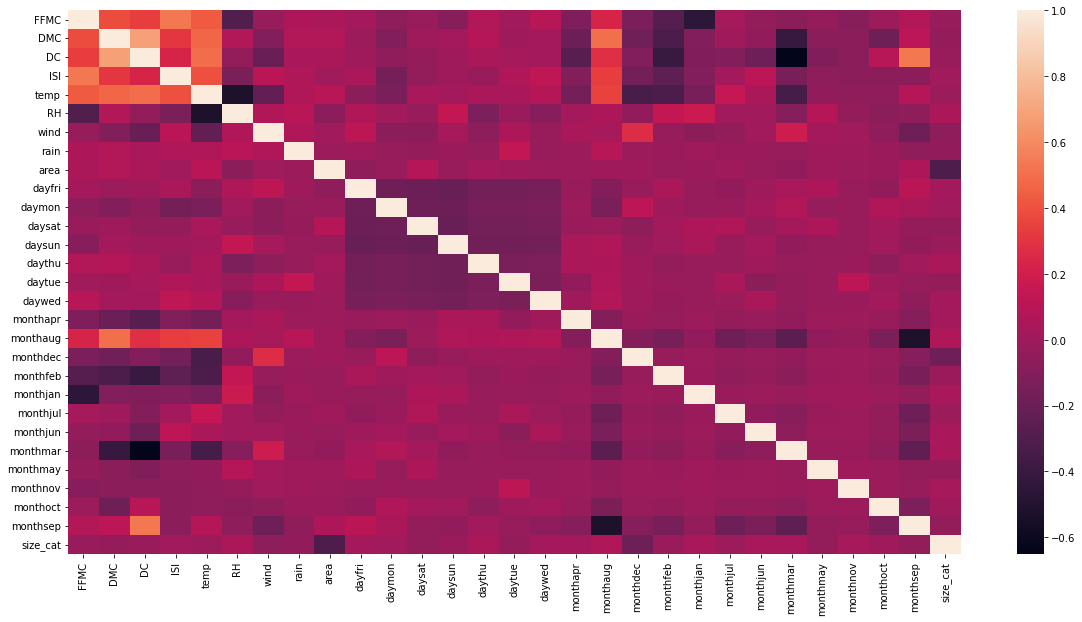

In [416]:
# Heatmap
plt.figure(figsize=(20,10))
sns.heatmap(corr)
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


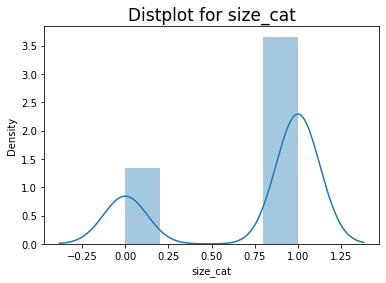

In [417]:
# Distplot on target variable
plt.title('Distplot for size_cat',fontsize=17)
sns.distplot(forest['size_cat'])
plt.show()

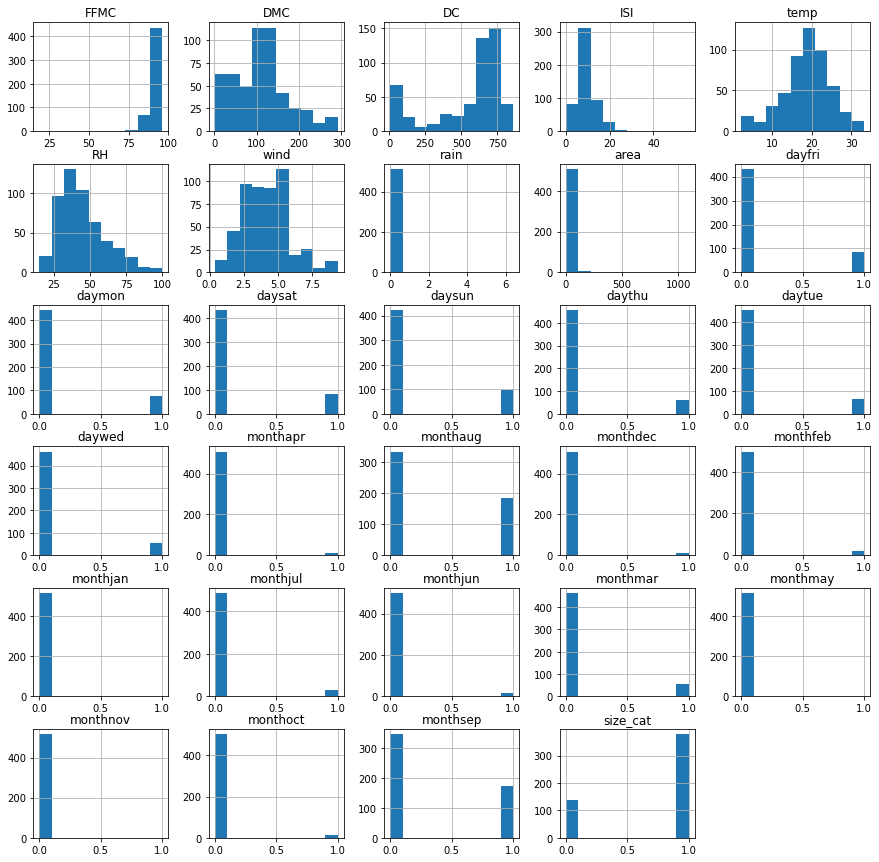

In [418]:
# histogram
forest.hist(figsize=(15,15))
plt.show()

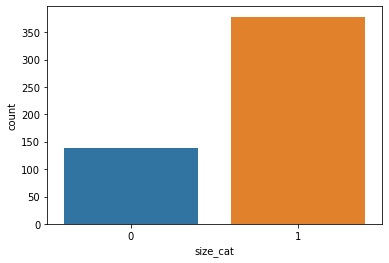

In [419]:
# Countplot
sns.countplot(x='size_cat',data=forest)
plt.show()

<AxesSubplot:>

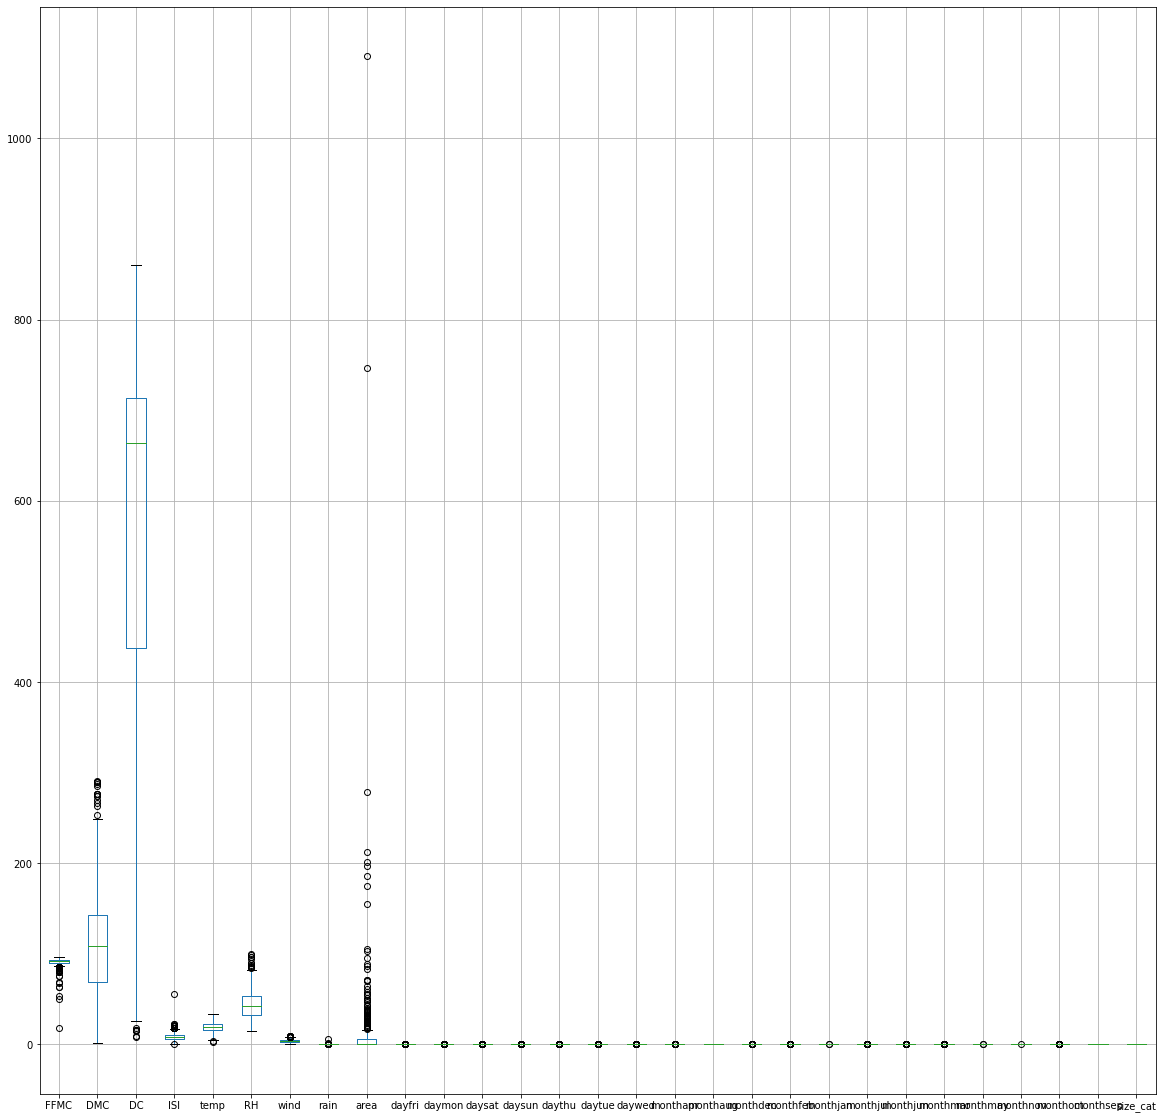

In [420]:
# Boxplot for outliers 
forest.boxplot(figsize=(20,20))

### Splitting into Input data and target variable

In [421]:
forest = forest.drop(['month','day'],axis=1)
forest.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_cat
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,1


In [422]:
X = forest.iloc[:,:-1]
Y = forest.iloc[:,-1]

In [423]:
X

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0


In [424]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_cat, Length: 517, dtype: int32

### Scaling Data

In [425]:
from sklearn.preprocessing import MinMaxScaler
minmaxscaler = preprocessing.MinMaxScaler()
X = minmaxscaler.fit_transform(X)

### Splitting into training and testing data

In [426]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [427]:
X_train.shape, X_test.shape

((346, 28), (171, 28))

In [428]:
y_train.shape,y_test.shape

((346,), (171,))

### Building Neural Network

In [429]:
first_model = Sequential([
    Dense(17, activation='relu', input_shape=(28,)),
    Dense(17, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [435]:
first_model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_56 (Dense)            (None, 17)                493       
                                                                 
 dense_57 (Dense)            (None, 17)                306       
                                                                 
 dense_58 (Dense)            (None, 1)                 18        
                                                                 
Total params: 817
Trainable params: 817
Non-trainable params: 0
_________________________________________________________________


In [436]:
# loss function for output take mean square error
first_model.compile(optimizer='adam',
                    loss ='binary_crossentropy',
                    metrics=['accuracy'])

In [437]:
# Fitting the model with train and test data
from sklearn.model_selection import train_test_split

hist=first_model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=1000)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 0.5621 - accuracy: 0.7341 - val_loss: 0.5836 - val_accuracy: 0.7251
Epoch 2/100
1/1 [==============================] - 0s 118ms/step - loss: 0.5616 - accuracy: 0.7341 - val_loss: 0.5838 - val_accuracy: 0.7251
Epoch 3/100
1/1 [==============================] - 0s 93ms/step - loss: 0.5610 - accuracy: 0.7341 - val_loss: 0.5839 - val_accuracy: 0.7251
Epoch 4/100
1/1 [==============================] - 0s 97ms/step - loss: 0.5605 - accuracy: 0.7341 - val_loss: 0.5841 - val_accuracy: 0.7251
Epoch 5/100
1/1 [==============================] - 0s 92ms/step - loss: 0.5599 - accuracy: 0.7341 - val_loss: 0.5843 - val_accuracy: 0.7251
Epoch 6/100
1/1 [==============================] - 0s 89ms/step - loss: 0.5594 - accuracy: 0.7341 - val_loss: 0.5844 - val_accuracy: 0.7251
Epoch 7/100
1/1 [==============================] - 0s 103ms/step - loss: 0.5588 - accuracy: 0.7341 - val_loss: 0.5846 - val_accuracy: 0.7251
Epoch 8/100
1/1 [===

Epoch 59/100
1/1 [==============================] - 0s 74ms/step - loss: 0.5302 - accuracy: 0.7457 - val_loss: 0.5962 - val_accuracy: 0.7427
Epoch 60/100
1/1 [==============================] - 0s 75ms/step - loss: 0.5295 - accuracy: 0.7457 - val_loss: 0.5964 - val_accuracy: 0.7427
Epoch 61/100
1/1 [==============================] - 0s 69ms/step - loss: 0.5288 - accuracy: 0.7457 - val_loss: 0.5967 - val_accuracy: 0.7427
Epoch 62/100
1/1 [==============================] - 0s 61ms/step - loss: 0.5281 - accuracy: 0.7457 - val_loss: 0.5969 - val_accuracy: 0.7427
Epoch 63/100
1/1 [==============================] - 0s 65ms/step - loss: 0.5274 - accuracy: 0.7457 - val_loss: 0.5972 - val_accuracy: 0.7427
Epoch 64/100
1/1 [==============================] - 0s 61ms/step - loss: 0.5267 - accuracy: 0.7457 - val_loss: 0.5974 - val_accuracy: 0.7368
Epoch 65/100
1/1 [==============================] - 0s 73ms/step - loss: 0.5260 - accuracy: 0.7457 - val_loss: 0.5976 - val_accuracy: 0.7368
Epoch 66/100


In [438]:
# Evaluating the model
first_model.evaluate(X_train,y_train)[1]

11/11 [==============================] - 0s 3ms/step - loss: 0.4973 - accuracy: 0.7572


0.7572254538536072

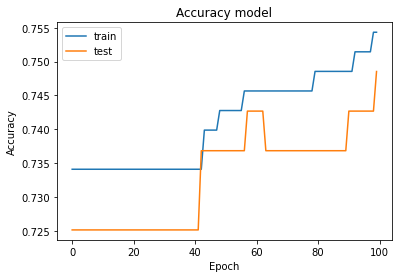

In [439]:
# History for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','test'],loc='best')
plt.show()

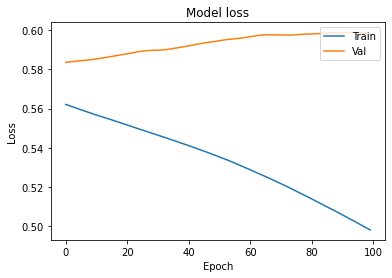

In [440]:
# Histogram for loss function
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [446]:
second_model = Sequential([
    Dense(32, activation='relu', input_shape=(28,)),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [447]:
second_model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_59 (Dense)            (None, 32)                928       
                                                                 
 dense_60 (Dense)            (None, 32)                1056      
                                                                 
 dense_61 (Dense)            (None, 32)                1056      
                                                                 
 dense_62 (Dense)            (None, 1)                 33        
                                                                 
Total params: 3,073
Trainable params: 3,073
Non-trainable params: 0
_________________________________________________________________


In [448]:
# loss function for output take mean square error
second_model.compile(optimizer='adam',
                    loss ='binary_crossentropy',
                    metrics=['accuracy'])

In [449]:
# Fitting the model with train and test data
from sklearn.model_selection import train_test_split

hist=first_model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=1000)

Epoch 1/100
1/1 [==============================] - 0s 192ms/step - loss: 0.4123 - accuracy: 0.8035 - val_loss: 0.6567 - val_accuracy: 0.7427
Epoch 2/100
1/1 [==============================] - 0s 124ms/step - loss: 0.4115 - accuracy: 0.8035 - val_loss: 0.6574 - val_accuracy: 0.7427
Epoch 3/100
1/1 [==============================] - 0s 96ms/step - loss: 0.4107 - accuracy: 0.8006 - val_loss: 0.6580 - val_accuracy: 0.7427
Epoch 4/100
1/1 [==============================] - 0s 111ms/step - loss: 0.4100 - accuracy: 0.8006 - val_loss: 0.6592 - val_accuracy: 0.7427
Epoch 5/100
1/1 [==============================] - 0s 113ms/step - loss: 0.4092 - accuracy: 0.8006 - val_loss: 0.6602 - val_accuracy: 0.7427
Epoch 6/100
1/1 [==============================] - 0s 90ms/step - loss: 0.4085 - accuracy: 0.8006 - val_loss: 0.6609 - val_accuracy: 0.7368
Epoch 7/100
1/1 [==============================] - 0s 64ms/step - loss: 0.4077 - accuracy: 0.8006 - val_loss: 0.6616 - val_accuracy: 0.7368
Epoch 8/100
1/1 

Epoch 59/100
1/1 [==============================] - 0s 58ms/step - loss: 0.3664 - accuracy: 0.8439 - val_loss: 0.7254 - val_accuracy: 0.7076
Epoch 60/100
1/1 [==============================] - 0s 63ms/step - loss: 0.3656 - accuracy: 0.8439 - val_loss: 0.7268 - val_accuracy: 0.7135
Epoch 61/100
1/1 [==============================] - 0s 78ms/step - loss: 0.3647 - accuracy: 0.8439 - val_loss: 0.7279 - val_accuracy: 0.7018
Epoch 62/100
1/1 [==============================] - 0s 78ms/step - loss: 0.3638 - accuracy: 0.8439 - val_loss: 0.7291 - val_accuracy: 0.7018
Epoch 63/100
1/1 [==============================] - 0s 81ms/step - loss: 0.3630 - accuracy: 0.8439 - val_loss: 0.7302 - val_accuracy: 0.7135
Epoch 64/100
1/1 [==============================] - 0s 81ms/step - loss: 0.3621 - accuracy: 0.8439 - val_loss: 0.7310 - val_accuracy: 0.7076
Epoch 65/100
1/1 [==============================] - 0s 77ms/step - loss: 0.3612 - accuracy: 0.8468 - val_loss: 0.7323 - val_accuracy: 0.7135
Epoch 66/100


In [450]:
# Evaluating the model
second_model.evaluate(X_train,y_train)[1]

11/11 [==============================] - 0s 4ms/step - loss: 0.6608 - accuracy: 0.7341


0.7341040372848511

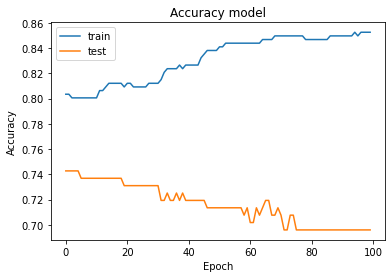

In [451]:
# History for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','test'],loc='best')
plt.show()

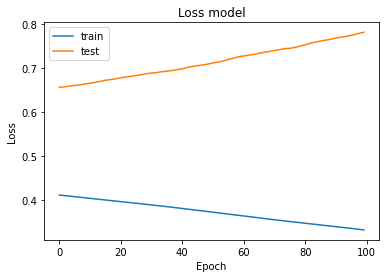

In [452]:
# History for accuracy
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','test'],loc='best')
plt.show()